In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [77]:
#253680 rows
# age category
# 1-Age 18 from to Age 24
# 2-Age 25 from to Age 29
# 3-Age 30 from to Age 34
# 4-Age 35 from to Age 39
# 5-Age 40 from to Age 44
# 6-Age 45 from to Age 49
# 7-Age 50 from to Age 54
# 8-Age 55 from to Age 59
# 9-Age 60 from to Age 64
# 10-Age 65 from to Age 69
# 11- Age 70 from to Age 74
# 12- age 75 to 79
# 13- Age 80 or older
# 14- Age 7 from to Age 9

# education level
# 1-Never attended school or only kindergarten
# 2-Grades 1 through 8 (Elementary)
# 3-Grades 9 through 11 (Some high school)
# 4-Grade 12 or GED (High school graduate)
# 5-College I year to 3 years (Some college or technical school)
# 6-College 4 years or more (College graduate)
# 7-Refused

# 1-Less than $10,000
# 2-Less than $15,000 ($10,000 to less than $15,000)
# 3-Less than $20,000 ($15,000 to less than $20,000)
# 4-Less than $25,000 ($20,000 to less than $25,000)
# 5-Less than $35,000 ($25,000 to less than $35,000)
# 6-Less than $50,000 ($35,000 to less than $50,000)
# 7-Less than $75,000 ($50,000 to less than $75,000)
# 8-$75,000 or more
# 77- Don’t know/Not sure
# 99R -refused
# BLANK - Not asked or Missing

In [2]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")


missing_counts = df.isnull().sum()

print(missing_counts[missing_counts > 0])


missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0])

for col in df.columns:
    print(f"{col}: {df[col].unique()[:20]}")

Series([], dtype: int64)
Series([], dtype: float64)
Diabetes_012: [0. 2. 1.]
HighBP: [1. 0.]
HighChol: [1. 0.]
CholCheck: [1. 0.]
BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45.]
Smoker: [1. 0.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [1. 0.]
NoDocbcCost: [0. 1.]
GenHlth: [5. 3. 2. 4. 1.]
MentHlth: [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16.]
PhysHlth: [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21.]
DiffWalk: [1. 0.]
Sex: [0. 1.]
Age: [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
Education: [4. 6. 3. 5. 2. 1.]
Income: [3. 1. 8. 6. 4. 7. 2. 5.]


In [3]:
class_counts = df['Diabetes_012'].value_counts().sort_index()
class_percent = df['Diabetes_012'].value_counts(normalize=True).sort_index() * 100

print("Counts:\n", class_counts)
print("\nPercentages:\n", class_percent)

Counts:
 Diabetes_012
0.0    213703
1.0      4631
2.0     35346
Name: count, dtype: int64

Percentages:
 Diabetes_012
0.0    84.241170
1.0     1.825528
2.0    13.933302
Name: proportion, dtype: float64


In [4]:
df["Diabetes_binary"] = df["Diabetes_012"].apply(lambda x: 0 if x == 0 else 1)
df = pd.get_dummies(df, columns=["Sex"], prefix="Sex")

if "GenHlth" in df.columns:
    df["GenHlth_reversed"] = 6 - df["GenHlth"]
def bin_health(x):
    if x == 0:
        return 0  # none
    elif 1 <= x <= 10:
        return 1  # mild
    elif 11 <= x <= 20:
        return 2  # moderate
    else:
        return 3  # severe

if "MentHlth" in df.columns:
    df["MentHlth_binned"] = df["MentHlth"].apply(bin_health)
if "PhysHlth" in df.columns:
    df["PhysHlth_binned"] = df["PhysHlth"].apply(bin_health)


In [5]:
def bmi_category(bmi):
    if bmi < 17:
        return "Underweight"
    elif 17 <= bmi <= 25:
        return "Normal"
    elif 26 <= bmi <= 33:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["BMI"].apply(bmi_category)

In [6]:
df["GeneralHealthScore"] = df["GenHlth"] + df["MentHlth"] + df["PhysHlth"]
df["DietQuality"] = df["Fruits"] + df["Veggies"]

In [7]:
age_map = {
    1: "18-24",
    2: "25-29",
    3: "30-34",
    4: "35-39",
    5: "40-44",
    6: "45-49",
    7: "50-54",
    8: "55-59",
    9: "60-64",
    10: "65-69",
    11: "70-74",
    12: "75-79",
    13: "80+",
    14: "7-9"
}
df["Age_Category"] = df["Age"].map(age_map)

In [8]:
edu_map = {
    1: "Kindergarten",
    2: "Elementary",
    3: "SomeHighSchool",
    4: "HighSchoolGrad",
    5: "SomeCollege",
    6: "CollegeGrad",
    7: "Refused"
}
df["Education_Level"] = df["Education"].map(edu_map)

In [9]:
income_map = {
    1: "<10k",
    2: "10-15k",
    3: "15-20k",
    4: "20-25k",
    5: "25-35k",
    6: "35-50k",
    7: "50-75k",
    8: "75k+",
    77: "Unknown",
    99: "Refused"
}
df["Income_Level"] = df["Income"].map(income_map)

In [10]:
categorical_cols = ["BMI_Category", "Age_Category", "Education_Level", "Income_Level"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
class_counts = df['Diabetes_binary'].value_counts().sort_index()
class_percent = df['Diabetes_binary'].value_counts(normalize=True).sort_index() * 100

print("\nBinary Target Counts:\n", class_counts)
print("\nBinary Target Percentages:\n", class_percent)

print("\nFinal dataset shape:", df.shape)
print(df.head())


Binary Target Counts:
 Diabetes_binary
0    213703
1     39977
Name: count, dtype: int64

Binary Target Percentages:
 Diabetes_binary
0    84.24117
1    15.75883
Name: proportion, dtype: float64

Final dataset shape: (253680, 56)
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  \
0                   0.0           0.0     0.0  ...   
1                   0.0           1.0     0.0  ...   
2                   0.0           0.0     1.0  ...   
3                   0.0           1.0     1.0  ...   
4                   0.0           1.0     1.0  ...   

   Education_Level_Kind

In [12]:
df["ComorbidityScore"] = df[["HighBP","HighChol","HeartDiseaseorAttack","Stroke"]].sum(axis=1)

numeric_df = df.select_dtypes(include=["int64", "float64"])
#
#
# selector = VarianceThreshold(threshold=0.05)  # 1% variance threshold
# selector.fit(numeric_df)
#
# # Columns to drop
# low_variance_cols = numeric_df.columns[~selector.get_support()]
# print("Dropping low-variance columns:", list(low_variance_cols))
#
# df = df.drop(columns=low_variance_cols)


In [13]:
print("Counts:\n", class_counts)
print("\nPercentages:\n", class_percent)

print("\nFinal dataframe shape:", df.shape)

Counts:
 Diabetes_binary
0    213703
1     39977
Name: count, dtype: int64

Percentages:
 Diabetes_binary
0    84.24117
1    15.75883
Name: proportion, dtype: float64

Final dataframe shape: (253680, 57)


In [14]:
drop_cols = ["AnyHealthcare", "NoDocbcCost", "Diabetes_binary"]
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

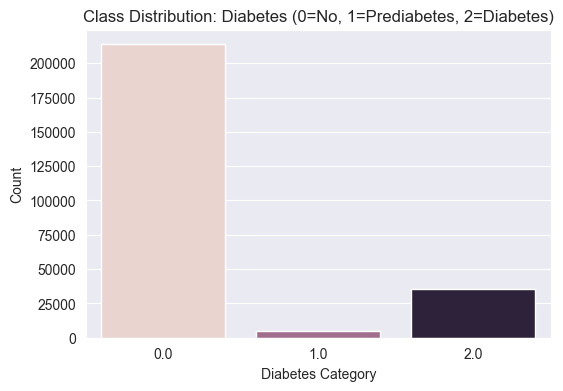

In [15]:
#1. Diabetes prevalence by category

plt.figure(figsize=(6,4))
sns.countplot(x="Diabetes_012", data=df, hue="Diabetes_012", legend=False)
plt.title("Class Distribution: Diabetes (0=No, 1=Prediabetes, 2=Diabetes)")
plt.xlabel("Diabetes Category")
plt.ylabel("Count")
plt.show()

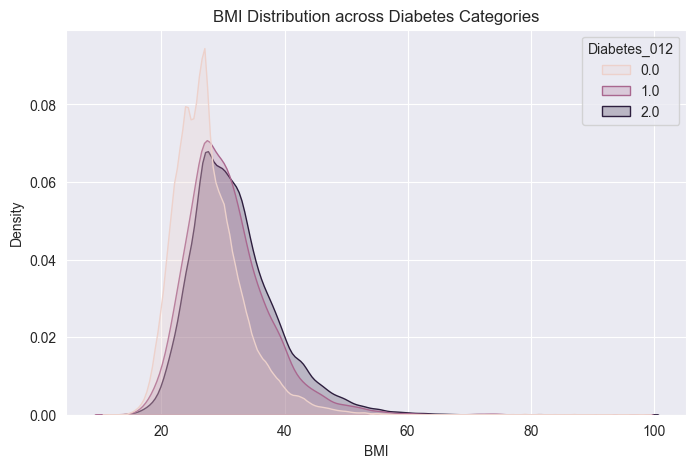

In [16]:
# 2. BMI Distribution by Diabetes

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="BMI", hue="Diabetes_012", common_norm=False, fill=True)
plt.title("BMI Distribution across Diabetes Categories")
plt.show()

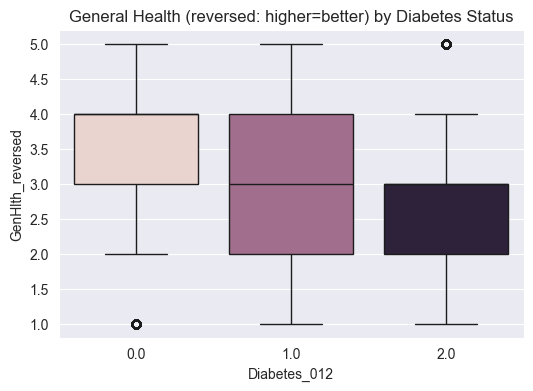

In [17]:
# 3. General Health (Reversed) vs Diabetes

plt.figure(figsize=(6,4))
sns.boxplot(x="Diabetes_012", y="GenHlth_reversed", data=df, hue="Diabetes_012",legend=False)
plt.title("General Health (reversed: higher=better) by Diabetes Status")
plt.show()


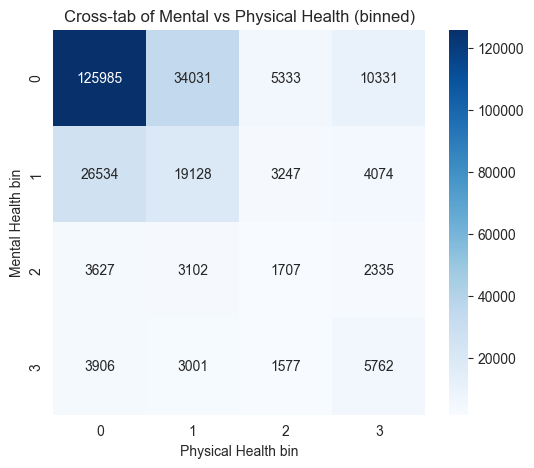

In [18]:
# 4. Mental vs Physical Health (binned) Heatmap

health_pivot = pd.crosstab(df["MentHlth_binned"], df["PhysHlth_binned"])
plt.figure(figsize=(6,5))
sns.heatmap(health_pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Cross-tab of Mental vs Physical Health (binned)")
plt.xlabel("Physical Health bin")
plt.ylabel("Mental Health bin")
plt.show()

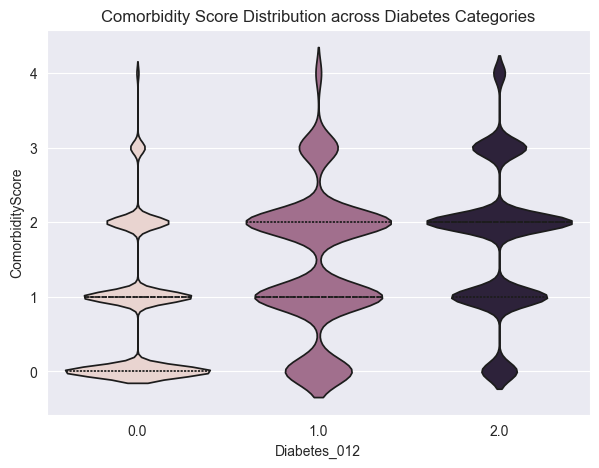

In [19]:
# 5. Comorbidity Score by Diabetes

plt.figure(figsize=(7,5))
sns.violinplot(x="Diabetes_012", y="ComorbidityScore", data=df, inner="quartile", hue="Diabetes_012",legend=False)
plt.title("Comorbidity Score Distribution across Diabetes Categories")
plt.show()


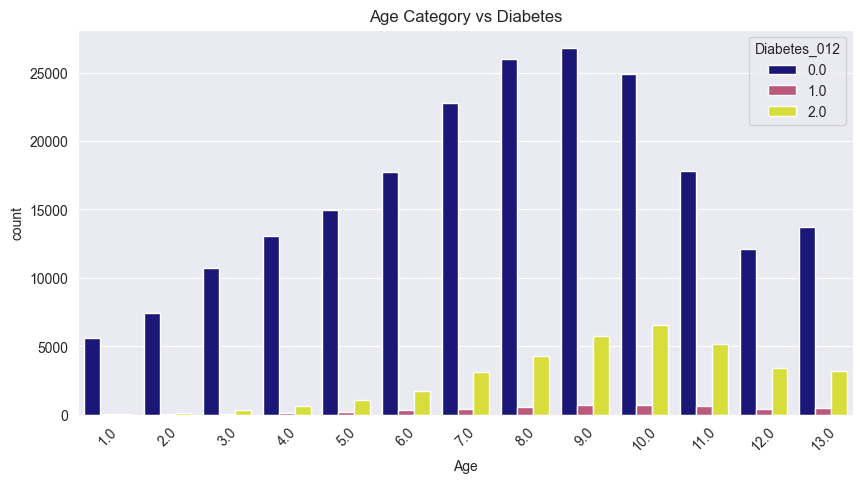

In [20]:
# 6. Age vs Diabetes

plt.figure(figsize=(10,5))
sns.countplot(x="Age", hue="Diabetes_012", data=df, palette="plasma")
plt.title("Age Category vs Diabetes")
plt.xticks(rotation=45)
plt.show()

In [21]:
df.to_csv("processed_diabetes.csv", index=False)

print("Processed dataset saved as processed_diabetes.csv")
print("Final shape:", df.shape)


Processed dataset saved as processed_diabetes.csv
Final shape: (253680, 54)
